In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

In [2]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

#https://book.pythontips.com/en/latest/args_and_kwargs.html
def density_contour(xdata, ydata, nbins_x, nbins_y, contour_level, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    lvl1 = contour_level[0]
    lvl1a = contour_level[1]
    lvl1b = contour_level[2]
    lvl2 = contour_level[3]
    lvl3 = contour_level[4]
    
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl2))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl3))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1a))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, lvl1b))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, one_sigma1, one_sigma2, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = [str(lvl1), str(lvl1a), str(lvl1b), str(lvl2), str(lvl3)][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

# CASE 1:
# Contour plots with DM & stars for dwarf 1, no RT, most recent redshift.
### Stellar COM: [ 49.67001746 -48.91751633 -60.9455316 ] pc
### Dark matter COM: [64.86652738 41.20460146 -6.55328106] pc

In [3]:
dm290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/noRT/dwarf_dm_5e8_0290.txt")
star290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/noRT/dwarf_star_5e8_0290.txt")

dx_dm290 = dm290[:,4] / 1000 # in kpc
dy_dm290 = dm290[:,5] / 1000 # in kpc
dz_dm290 = dm290[:,6] / 1000 # in kpc

dx_star290 = star290[:,4] / 1000 # in kpc
dy_star290 = star290[:,5] / 1000 # in kpc
dz_star290 = star290[:,6] / 1000 # in kpc

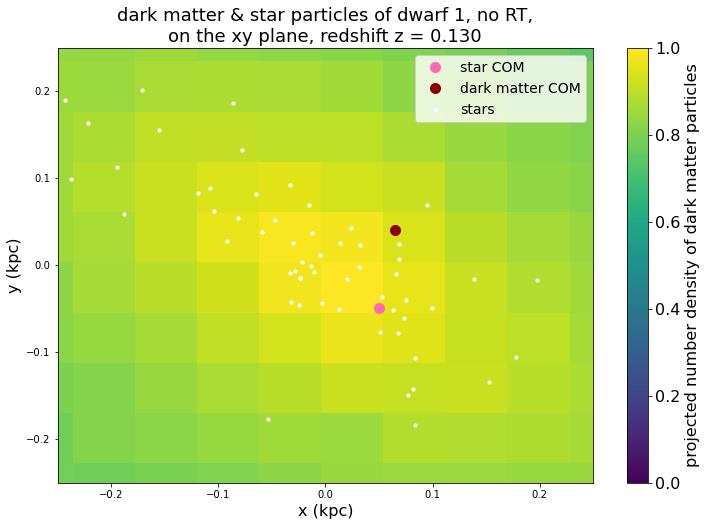

In [23]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm290, dy_dm290, bins=390, norm=LogNorm(), cmap='viridis') # this plots dx and dy
plt.scatter(dx_star290, dy_star290, color='white',s=10, label='stars') # this plots dx and dy

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm290, dy_dm290, 80, 80,  [0.35, 0.51, 0.64, 0.77, 0.89], \
                ax=ax, colors=['orange','yellow','orange','yellow','orange'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.19 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('y (kpc)', fontsize=16)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

ax.set_facecolor('black')
plt.plot(49.67001746 / 1000, -48.91751633 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(64.86652738 / 1000, 41.20460146 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')

plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, no RT,\non the xy plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1noRT_xy.png')

C:\Users\nguye\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


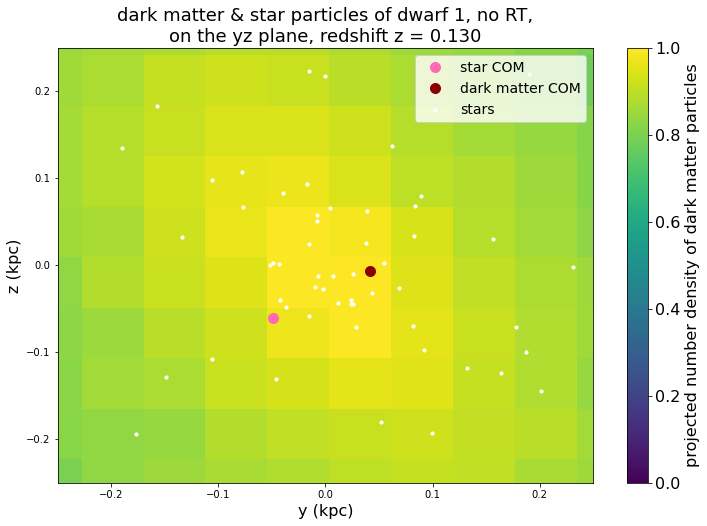

In [24]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dy_dm290, dz_dm290, bins=390, norm=LogNorm(), cmap='viridis') # this plots dy and dz
plt.scatter(dy_star290, dz_star290, color='white',s=10, label='stars') # this plots dy and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dy_dm290, dz_dm290, 80, 80, [0.35, 0.51, 0.64, 0.77, 0.89], \
                ax=ax, colors=['orange','yellow','orange','yellow','orange'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.19 kpc
plt.xlabel('y (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

ax.set_facecolor('black')
plt.plot(-48.91751633 / 1000, -60.9455316 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(41.20460146 / 1000, -6.55328106 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')

plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, no RT,\non the yz plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1noRT_yz.png')

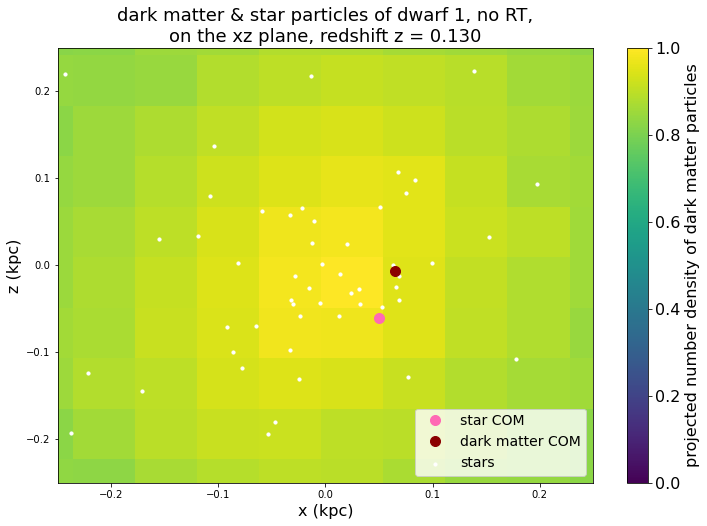

In [25]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm290, dz_dm290, bins=390, norm=LogNorm(), cmap='viridis') # this plots dx and dz
plt.scatter(dx_star290, dz_star290, color='white',s=10, label='stars') # this plots dy and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm290, dz_dm290, 80, 80, [0.35, 0.51, 0.64, 0.77, 0.89], \
                ax=ax, colors=['orange','yellow','orange','yellow','orange'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.19 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(49.67001746 / 1000, -60.9455316 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(64.86652738 / 1000, -6.55328106 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')

plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, no RT,\non the xz plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1noRT_xz.png')

# CASE 2:
# Contour plots with DM & stars for dwarf 1, with RT, most recent redshift.
### Stellar COM: [-45.57935211 -40.38662148  24.02137645] pc
### Dark matter COM: [ 35.24883169 122.93960062  26.32844281] pc

In [26]:
dm290RT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_dm_5e8_rt_0290.txt")
star290RT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/RT/dwarf_star_5e8_rt_0290.txt")

dx_dm290RT = dm290RT[:,4] / 1000 # in kpc
dy_dm290RT = dm290RT[:,5] / 1000 # in kpc
dz_dm290RT = dm290RT[:,6] / 1000 # in kpc

dx_star290RT = star290RT[:,4] / 1000 # in kpc
dy_star290RT = star290RT[:,5] / 1000 # in kpc
dz_star290RT = star290RT[:,6] / 1000 # in kpc

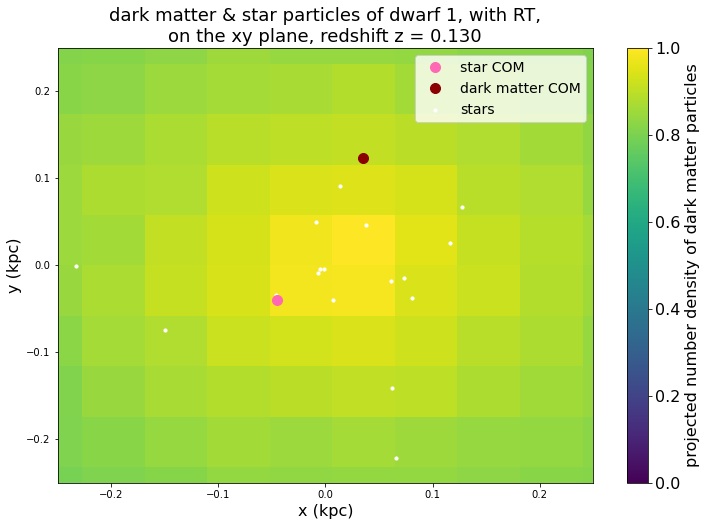

In [27]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm290RT, dy_dm290RT, bins=390, norm=LogNorm(), cmap='viridis') # this plots dx and dy
plt.scatter(dx_star290RT, dy_star290RT, color='white',s=10, label='stars') # this plots dx and dy

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm290RT, dy_dm290RT, 80, 80, [0.28, 0.53, 0.68, 0.78, 0.91], \
                ax=ax, colors=['yellow','orange','yellow','orange','yellow'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.15 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('y (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(-45.57935211 / 1000, -40.38662148 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(35.24883169 / 1000, 122.93960062 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, with RT,\non the xy plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1RT_xy.png')

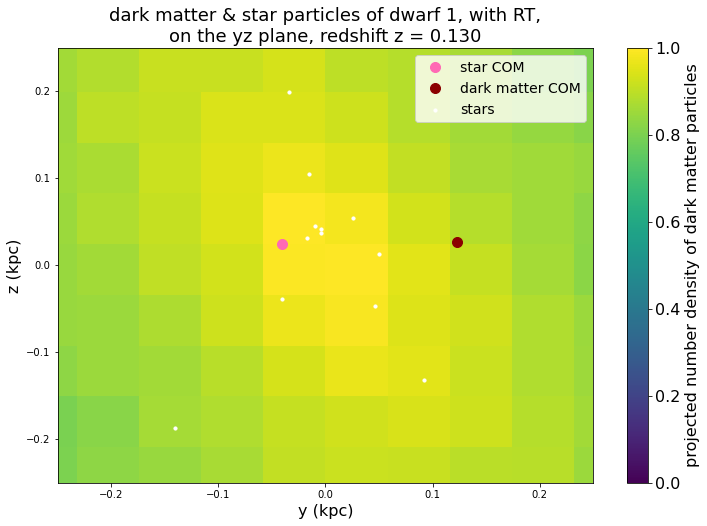

In [28]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dy_dm290RT, dz_dm290RT, bins=390, norm=LogNorm(), cmap='viridis') # this plots dy and dz
plt.scatter(dy_star290RT, dz_star290RT, color='white',s=10, label='stars') # this plots dy and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dy_dm290RT, dz_dm290RT, 80, 80, [0.28, 0.53, 0.68, 0.78, 0.91], \
                ax=ax, colors=['yellow','orange','yellow','orange','yellow'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.15 kpc
plt.xlabel('y (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(-40.38662148 / 1000, 24.02137645 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(122.93960062 / 1000, 26.32844281 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, with RT,\non the yz plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1RT_yz.png')

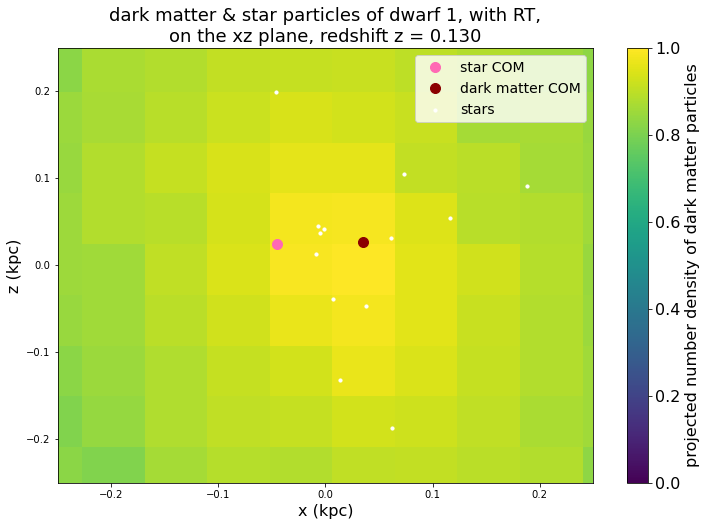

In [29]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm290RT, dz_dm290RT, bins=390, norm=LogNorm(), cmap='viridis') # this plots dx and dz
plt.scatter(dx_star290RT, dz_star290RT, color='white',s=10, label='stars') # this plots dx and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='viridis'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm290RT, dz_dm290RT, 80, 80, [0.28, 0.53, 0.68, 0.78, 0.91], \
                ax=ax, colors=['yellow','orange','yellow','orange','yellow'])

lim = 0.25
# for reference, r_vir = 11.3 kpc, r_half = 0.15 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(-45.57935211 / 1000, 24.02137645 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(35.24883169 / 1000, 26.32844281 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 1, with RT,\non the xz plane, redshift z = 0.130', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_1RT_xz.png')

# CASE 3:
# Contour plots with DM & stars for dwarf 2, no RT, most recent redshift.
### Stellar COM: [ 31.30523866 -35.47830822  37.90455387] pc
### Dark matter COM: [ 63.31490462 -28.50094103  -3.40585748] pc

In [30]:
dm300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/noRT/dwarf_dm_7e8_0300.txt")
star300 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/noRT/dwarf_star_7e8_0300.txt")

dx_dm300 = dm300[:,4] / 1000 # in kpc
dy_dm300 = dm300[:,5] / 1000 # in kpc
dz_dm300 = dm300[:,6] / 1000 # in kpc

dx_star300 = star300[:,4] / 1000 # in kpc
dy_star300 = star300[:,5] / 1000 # in kpc
dz_star300 = star300[:,6] / 1000 # in kpc

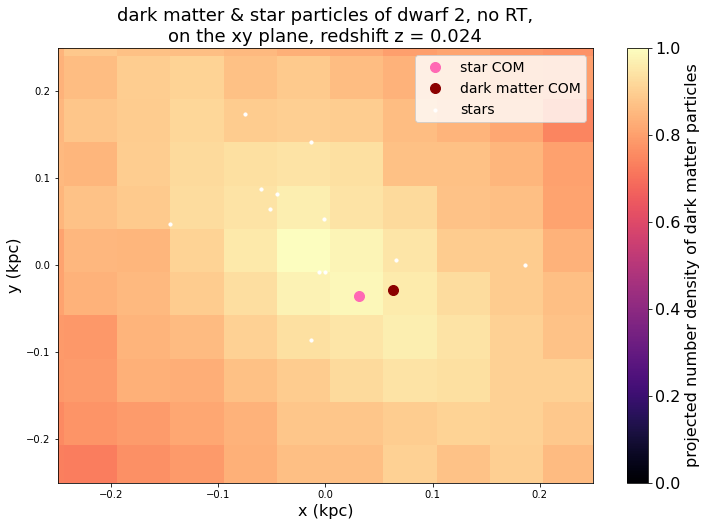

In [31]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm300, dy_dm300, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.scatter(dx_star300, dy_star300, color='white',s=10, label='stars') # this plots dx and dy

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm300, dy_dm300, 80, 80, [0.32, 0.56, 0.66, 0.78, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.75 kpc, r_half = 0.39 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('y (kpc)', fontsize=16)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

ax.set_facecolor('black')
plt.plot(31.30523866 / 1000, -35.47830822 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(63.31490462 / 1000, -28.50094103 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, no RT,\non the xy plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2noRT_xy.png')

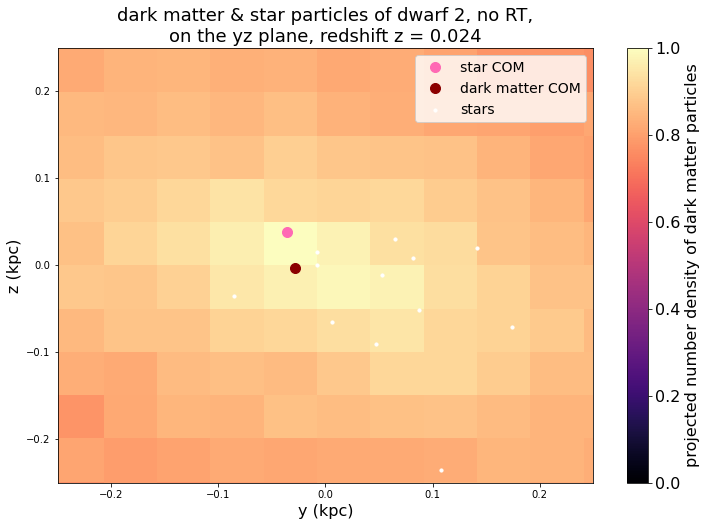

In [32]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dy_dm300, dz_dm300, bins=390, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.scatter(dy_star300, dz_star300, color='white',s=10, label='stars') # this plots dy and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dy_dm300, dz_dm300, 80, 80, [0.32, 0.56, 0.66, 0.78, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.75 kpc, r_half = 0.39 kpc
plt.xlabel('y (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(-35.47830822 / 1000, 37.90455387 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(-28.50094103 / 1000, -3.40585748 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, no RT,\non the yz plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2noRT_yz.png')

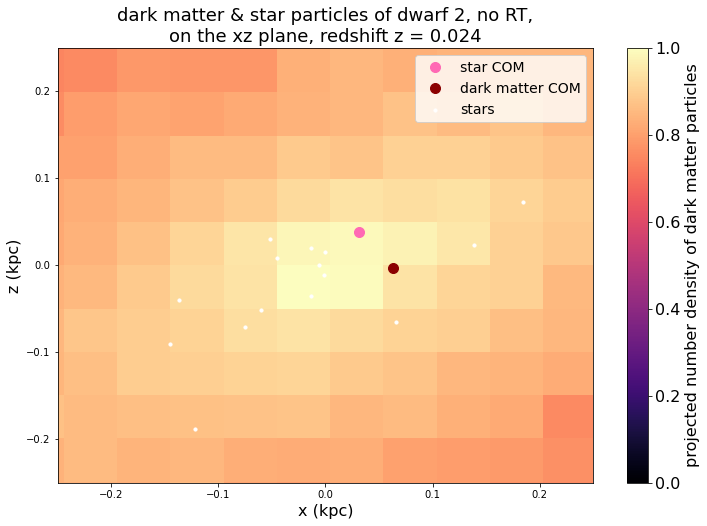

In [33]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm300, dz_dm300, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.scatter(dx_star300, dz_star300, color='white',s=10, label='stars') # this plots dx and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm300, dz_dm300, 80, 80, [0.32, 0.56, 0.66, 0.78, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.75 kpc, r_half = 0.39 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) 
plt.ylim(-lim, lim) 

ax.set_facecolor('black')
plt.plot(31.30523866 / 1000, 37.90455387 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(63.31490462 / 1000, -3.40585748 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, no RT,\non the xz plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2noRT_xz.png')

# CASE 4:
# Contour plots with DM & stars for dwarf 2, with RT, most recent redshift.
### Stellar COM: [-104.65706052  181.45054531   23.53014314] pc
### Dark matter COM: [-22.0370101  115.98802558  89.01133649] pc

In [34]:
dm300RT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/RT/dwarf_dm_7e8_rt_0300.txt")
star300RT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/RT/dwarf_star_7e8_rt_0300.txt")

dx_dm300RT = dm300RT[:,4] / 1000 # in kpc
dy_dm300RT = dm300RT[:,5] / 1000 # in kpc
dz_dm300RT = dm300RT[:,6] / 1000 # in kpc

dx_star300RT = star300RT[:,4] / 1000 # in kpc
dy_star300RT = star300RT[:,5] / 1000 # in kpc
dz_star300RT = star300RT[:,6] / 1000 # in kpc

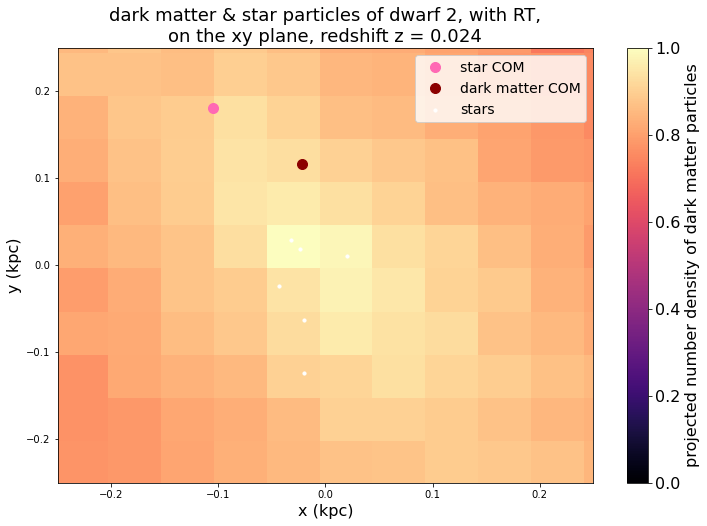

In [35]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm300RT, dy_dm300RT, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dy
plt.scatter(dx_star300RT, dy_star300RT, color='white',s=10, label='stars') # this plots dx and dy

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm300RT, dy_dm300RT, 80, 80, [0.31, 0.56, 0.66, 0.80, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.73 kpc, r_half = 0.03 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('y (kpc)', fontsize=16)
plt.xlim(-lim, lim) # the limit is the virial radius
plt.ylim(-lim, lim) # the limit is the virial radius

ax.set_facecolor('black')
plt.plot(-104.65706052 / 1000, 181.45054531 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(-22.0370101 / 1000, 115.98802558 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, with RT,\non the xy plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2RT_xy.png')

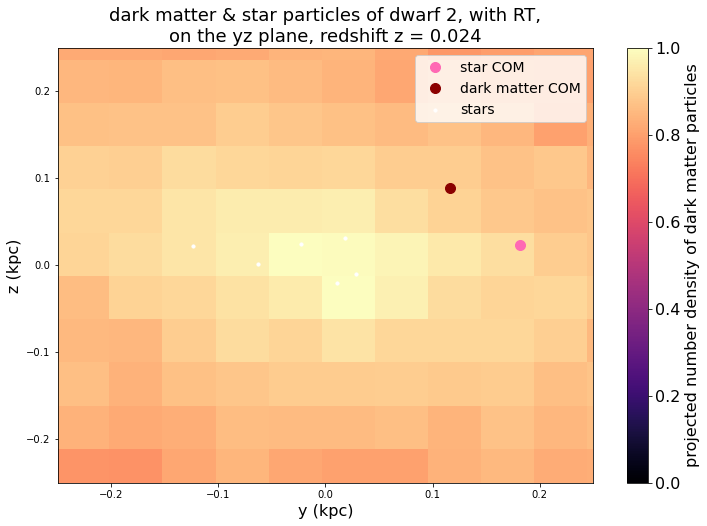

In [36]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dy_dm300RT, dz_dm300RT, bins=390, norm=LogNorm(), cmap='magma') # this plots dy and dz
plt.scatter(dy_star300RT, dz_star300RT, color='white',s=10, label='stars') # this plots dy and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dy_dm300RT, dz_dm300RT, 80, 80, [0.31, 0.56, 0.66, 0.80, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.73 kpc, r_half = 0.03 kpc
plt.xlabel('y (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) # the limit is the virial radius
plt.ylim(-lim, lim) # the limit is the virial radius

ax.set_facecolor('black')
plt.plot(181.45054531 / 1000, 23.53014314 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(115.98802558 / 1000, 89.01133649 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, with RT,\non the yz plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2RT_yz.png')

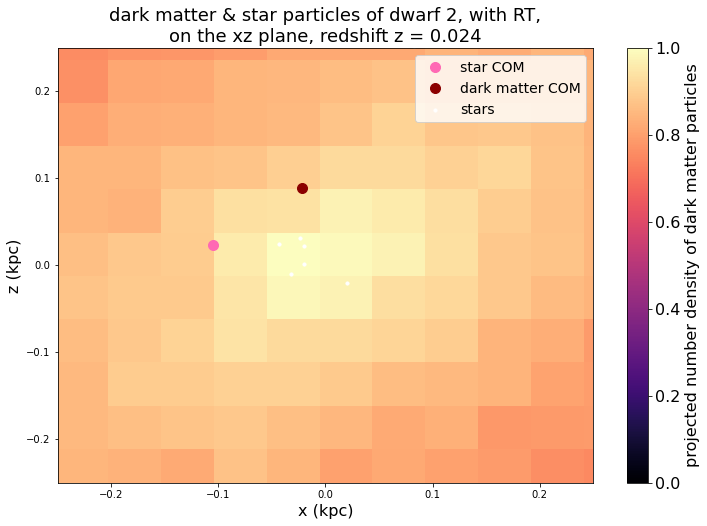

In [37]:
fig, ax=plt.subplots(figsize=(12,8))

plt.hist2d(dx_dm300RT, dz_dm300RT, bins=390, norm=LogNorm(), cmap='magma') # this plots dx and dz
plt.scatter(dx_star300RT, dz_star300RT, color='white',s=10, label='stars') # this plots dx and dz

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=None, cmap='magma'), cax=None, ax=None)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='projected number density of dark matter particles', size=16)

density_contour(dx_dm300RT, dz_dm300RT, 80, 80, [0.31, 0.56, 0.66, 0.80, 0.90], \
                ax=ax, colors=['yellow','limegreen','yellow','limegreen','yellow'])

lim = 0.25
# for reference, r_vir = 9.73 kpc, r_half = 0.03 kpc
plt.xlabel('x (kpc)', fontsize=16)
plt.ylabel('z (kpc)', fontsize=16)
plt.xlim(-lim, lim) # the limit is the virial radius
plt.ylim(-lim, lim) # the limit is the virial radius

ax.set_facecolor('black')
plt.plot(-104.65706052 / 1000, 23.53014314 / 1000, 'o', color='hotpink', markersize=10, label='star COM')
plt.plot(-22.0370101 / 1000, 89.01133649 / 1000, 'o', color='darkred', markersize=10, label='dark matter COM')
plt.legend(fontsize=14)

plt.title('dark matter & star particles of dwarf 2, with RT,\non the xz plane, redshift z = 0.024', \
          loc='center', fontsize=18)

plt.show()
#plt.savefig('contour_2RT_xz.png')